# LIBRARY

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score

# LOAD DATA

In [29]:
game_df = pd.read_csv('https://raw.githubusercontent.com/dfin12/submission_kedua_machine_learning_trapan/refs/heads/main/steam.csv')

# EDA

Melihat tipe data dari setiap kolom

In [30]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

Melihat statistika deskriptif dari fitur numerik yang ada

In [31]:
game_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


Menampilkan 5 data teratas

In [32]:
game_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


Melihat nilai kosong untuk setiap fitur

In [33]:
missing_values = game_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

,0
developer,1
publisher,14


Melihat adanya duplikasi pada data

In [34]:
duplicate_rows = game_df[game_df.duplicated()]
duplicate_rows

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price


Visualisasi top 5 genre

In [35]:
all_genres = [genre for sublist in game_df['genres'].dropna().apply(lambda x: x.split(';')) for genre in sublist]
genre_counts = Counter(all_genres)
top_5_genres = genre_counts.most_common(5)
genres, counts = zip(*top_5_genres)

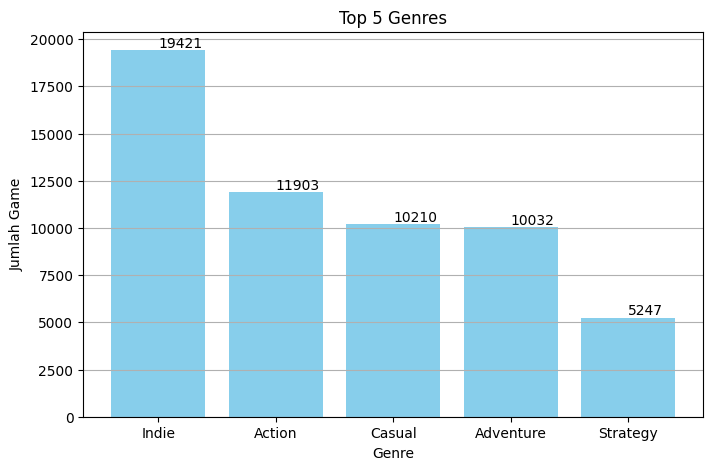

In [36]:
plt.figure(figsize=(8, 5))
bars = plt.bar(genres, counts, color='skyblue')
plt.title('Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Jumlah Game')
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') # va: vertical alignment

plt.show()

# PREPROCESSING DATA

Pemilihan fitur dan penanganan missing values

In [37]:
game_df_selected = game_df[['name', 'genres', 'steamspy_tags', 'price', 'positive_ratings', 'negative_ratings']].copy()
game_df_selected.dropna(inplace=True)

Transformasi data

In [38]:
for col in ['genres', 'steamspy_tags']:
    game_df_selected[col] = game_df_selected[col].apply(lambda x: x.split(';') if isinstance(x, str) else [])

Membuat kolom rating terintegrasi dan menghapus fitur positive_ratings dan negative_ratings

In [39]:
game_df_selected['ratings'] = game_df_selected['positive_ratings'] / (game_df_selected['positive_ratings'] + game_df_selected['negative_ratings'] + 1e-5)
game_df_selected.drop(['positive_ratings', 'negative_ratings'], axis=1, inplace=True)

Encoding fitur genres dan tag menggunakan miltilabel

In [40]:
mlb_genres = MultiLabelBinarizer()
mlb_tags = MultiLabelBinarizer()

genres_encoded = mlb_genres.fit_transform(game_df_selected['genres'])
tags_encoded = mlb_tags.fit_transform(game_df_selected['steamspy_tags'])

In [41]:
features = np.hstack((genres_encoded, tags_encoded))

feature scaling price dan rating

In [42]:
numerics = game_df_selected[['price', 'ratings']].values
scaler = MinMaxScaler()
numeric_scaled = scaler.fit_transform(numerics)

Final feature matriks

In [43]:
X = np.hstack((features, numeric_scaled))

# MODELING

Input dimensi

In [44]:
input_dim = X.shape[1]
encoding_dim = 32

Membangun model Neural Network

In [45]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
embedding = Dense(encoding_dim, activation='relu', name='embedding')(encoded)
decoded = Dense(64, activation='relu')(embedding)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

In [46]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder = Model(inputs=input_layer, outputs=embedding)

In [47]:
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X, X, epochs=20, batch_size=64, validation_split=0.2, callbacks=[EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0575 - val_loss: 0.0054
Epoch 2/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 3/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 4/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 5/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 6/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 7/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 8/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 9/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 10/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 11/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 12/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

# EVALUATION & RECOMENDATION

Visualisasi loss

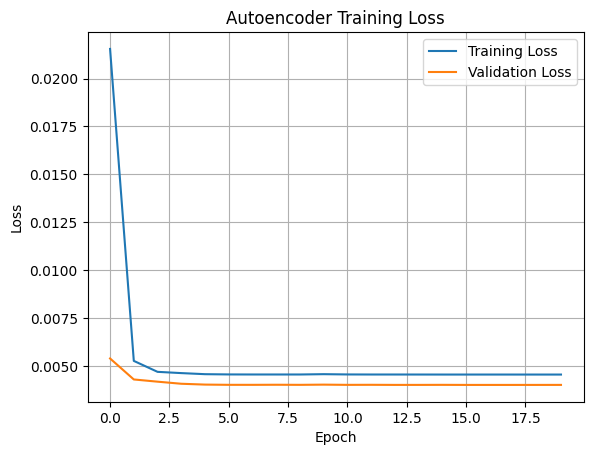

In [48]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Ekstraksi embedding untuk seluruh game

In [49]:
game_embeddings = encoder.predict(X)

def recommend(game_name=None, genre=None, price_range=None, min_rating=None, top_k=20):
    filtered_indices = game_df_selected.index.tolist()

    if genre:
        filtered_indices = game_df_selected[game_df_selected['genres'].apply(lambda g: genre in g)].index.tolist()

    if price_range:
        low, high = price_range
        filtered_indices = [i for i in filtered_indices if low <= game_df_selected.loc[i, 'price'] <= high]

    if min_rating:
        filtered_indices = [i for i in filtered_indices if game_df_selected.loc[i, 'ratings'] >= min_rating]

    if game_name:
        if game_name not in game_df_selected['name'].values:
            return f"Game '{game_name}' tidak ditemukan."
        idx = game_df_selected[game_df_selected['name'] == game_name].index[0]
        query_vec = game_embeddings[idx].reshape(1, -1)
    else:
        if not filtered_indices:
            return "Tidak ada game yang cocok dengan kriteria."
        query_vec = game_embeddings[filtered_indices].mean(axis=0).reshape(1, -1)

    sim_scores = cosine_similarity(query_vec, game_embeddings)[0]
    top_indices = np.argsort(sim_scores)[::-1]

    top_filtered = [i for i in top_indices if i in filtered_indices][:top_k]
    return game_df_selected.iloc[top_filtered][['name', 'genres', 'price', 'ratings']]

847/847 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Berdasarkan nama

In [50]:
recommend(game_name="Counter-Strike")

,name,genres,price,ratings
0,Counter-Strike,[Action],7.19,0.973888
10,Counter-Strike: Source,[Action],7.19,0.956362
203,Call of Duty® 4: Modern Warfare®,[Action],19.99,0.913995
258,Call of Duty®: Modern Warfare® 2,[Action],19.99,0.913925
330,Unreal Tournament 3 Black,[Action],13.99,0.896731
7,Counter-Strike: Condition Zero,[Action],7.19,0.893871
26033,Psyvariar Delta,[Action],23.79,0.937499
503,PAYDAY™ The Heist,[Action],10.99,0.931868
8924,DoDonPachi Resurrection,[Action],22.99,0.962441
13,Half-Life 2: Deathmatch,[Action],3.99,0.884384


berdasarkan genre

In [51]:
recommend(genre="Action")

,name,genres,price,ratings
14560,ShineG In The Bullethell,"[Action, Adventure, Casual, Indie, RPG, Strategy]",5.19,0.746667
25773,My Super Defender - Battle Santa Edition,"[Action, Adventure, Casual, Indie, Massively M...",1.69,0.888888
24700,Mariner Accident,"[Action, Adventure, Casual, Indie, RPG]",0.79,0.899999
23482,ShyChess,"[Sexual Content, Nudity, Violent, Gore, Action...",1.69,0.827586
4602,Overture,"[Action, Adventure, Casual, Indie, RPG, Strategy]",3.99,0.786425
26533,Rogue Star Rescue,"[Action, Adventure, Indie, Strategy, Early Acc...",11.39,0.999999
25084,Badminton Warrior (羽毛球勇士 中国新年版),"[Action, Adventure, Indie, Sports, Early Access]",7.19,0.899999
21058,Ages of Mages: The last keeper,"[Action, Adventure, Casual, Indie, RPG]",9.29,0.854167
22781,Teleportals. I swear it's a nice game,"[Action, Adventure, Indie]",0.79,0.953846
13612,Pix,"[Action, Adventure, Indie, Strategy, Early Acc...",1.99,0.833332


berdasarkan rating dan harga

In [52]:
recommend(price_range=(0, 10), min_rating=0.9)

,name,genres,price,ratings
17151,Octopus Bar,"[Action, Adventure, Casual, Free to Play, Indi...",0.00,0.947368
3320,Roundabout,"[Action, Adventure, Casual, Indie]",6.99,0.932018
4053,SanctuaryRPG: Black Edition,"[Action, Adventure, Casual, Indie, RPG, Strategy]",5.79,0.926941
8045,Ara Fell,"[Action, Adventure, Casual, Indie, RPG]",6.99,0.954145
904,Beat Hazard,"[Action, Casual, Indie]",6.99,0.950483
24590,Food Drive: Race against Hunger,"[Action, Casual, Free to Play, Indie, Early Ac...",0.00,0.922078
10437,Aviators,"[Action, Casual, Indie, Sports, Early Access]",1.99,0.999990
9621,Pixel Cup Soccer 17,"[Action, Casual, Indie, Sports, Early Access]",6.99,0.910204
23430,Music Racer,"[Action, Casual, Indie, Racing]",1.69,0.922638
18095,Project Rhombus,"[Action, Casual, Free to Play, Indie]",0.00,0.926690


Precision@K Evaluation

In [53]:
def precision_at_k(game_index, top_k=20):
    query_vec = game_embeddings[game_index].reshape(1, -1)
    sim_scores = cosine_similarity(query_vec, game_embeddings)[0]
    top_indices = np.argsort(sim_scores)[::-1][1:top_k+1]

    target_tags = set(game_df_selected.iloc[game_index]['steamspy_tags'])
    hits = 0
    for idx in top_indices:
        recommended_tags = set(game_df_selected.iloc[idx]['steamspy_tags'])
        if len(target_tags & recommended_tags) > 0:
            hits += 1
    return hits / top_k

Evaluasi rata-rata precision@20 untuk 100 sample

In [54]:
sample_indices = np.random.choice(game_df_selected.index, size=1000, replace=False)
avg_precision = np.mean([precision_at_k(i, top_k=20) for i in sample_indices])
print(f"Average Precision@10: {avg_precision:.4f}")

Average Precision@10: 0.9685
